## 分水岭算法，图像分割

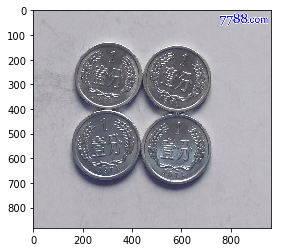

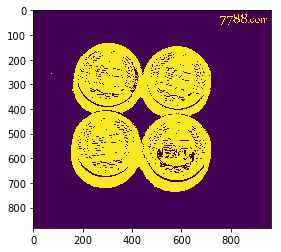

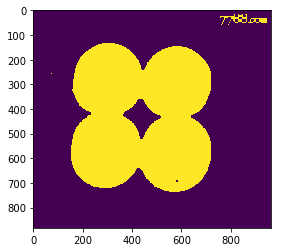

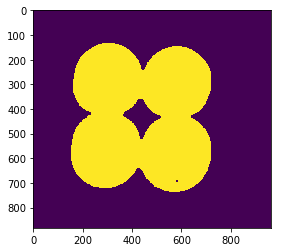

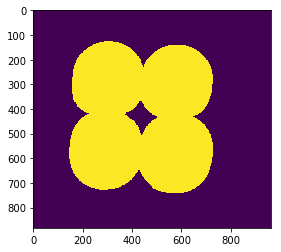

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/situ.st.1/Pictures/coin.jpg')
plt.imshow(img),plt.show()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh),plt.show()
# noise removal
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
kernel = np.ones((11,11),np.uint8)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
kernel = np.ones((5,5),np.uint8)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(closing)
plt.show()
plt.imshow(opening)
plt.show()
plt.imshow(sure_bg)
plt.show()

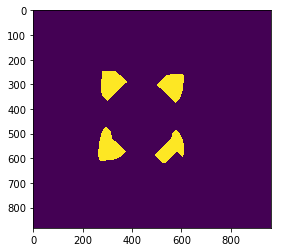

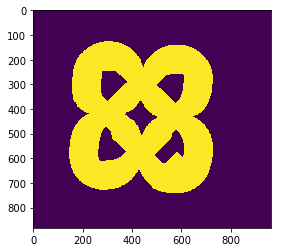

In [2]:
# Finding sure foreground area
# 距离变换的基本含义是计算一个图像中非零像素点到最近的零像素点的距离，也就是到零像素点的最短距离
# 1个最常见的距离变换算法就是通过连续的腐蚀操作来实现，腐蚀操作的停止条件是所有前景像素都被完全
# 腐蚀。这样根据腐蚀的先后顺序，我们就得到各个前景像素点到前景中心骨架像素点的
# 距离。根据各个像素点的距离值，设置为不同的灰度值。这样就完成了二值图像的距离变换
#cv2.distanceTransform(src, distanceType, maskSize)
# 第二个参数0,1,2 分别表示CV_DIST_L1, CV_DIST_L2 , CV_DIST_C

dist_transform = cv2.distanceTransform(opening,1,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

#法二：有些情况下你可能只需要对前景进行分割，而不需要将紧挨在一起的对象分开，此时就没有必要使用距离变换了，
#腐蚀就足够了。当然腐蚀也可以用来提取肯定是前景的区域。
#kernel = np.ones((51,51),np.uint8)
#sure_fg = cv2.erode(sure_bg,kernel,iterations=3)

plt.imshow(sure_fg)
plt.show()
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

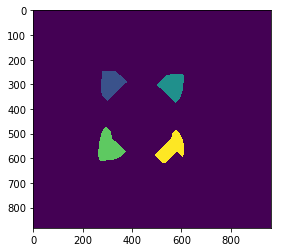

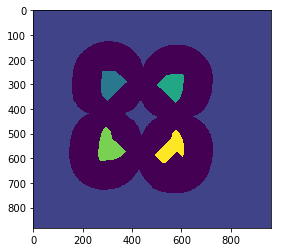

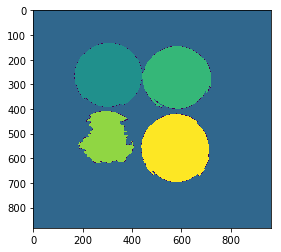

In [3]:
#cv2.connectedComponents()会把将背景标记为0，其他的对象使用从1 开始的正整数标记。
# Marker labelling
ret, markers1 = cv2.connectedComponents(sure_fg)
#plt.imshow(markers1)
#plt.show()
# Add one to all labels so that sure background is not 0, but 1
markers = markers1+1
plt.imshow(markers)
plt.show()
#但我们知道如果背景标记为0,那分水岭算法就会把它当成未知区域了.所以我们想使用不同的整数标记它们。
#而对不确定的区域（函数cv2.connectedComponents 输出的结果中使用unknown 定义未知区域）标记为0。
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()    
#深蓝色区域为未知区域。肯定是硬币的区域使用不同的颜色标记。其余区域就是用浅蓝色标记的背景了。
#现在标签准备好了。到最后一步：实施分水岭算法了。标签图像将会被修改，边界区域的标记将变为-1.   
markers3 = cv2.watershed(img,markers)
img[markers3 == -1] = [255,0,0]
plt.imshow(markers3)
plt.show()